In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import match
import seaborn as sns

In [2]:
fiscal1516_data = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/Sdf16_1a.txt", sep = '\t')
#math_data = pd.read_csv('/Users/alefiyanaseem/Desktop/Data Visualization/math-achievement-lea-sy2015-16.csv')
demographics_data = pd.read_csv('/Users/alefiyanaseem/Desktop/Data Visualization/ccd_lea_052_1516_w_1a_011717.csv')
#nces_all_data = pd.merge(fiscal1516_data, math_data, on='LEAID')
nces_data_demo = pd.merge(fiscal1516_data, demographics_data, on = ["LEAID"], how = "left")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nces_data_demo

,LEAID,CENSUSID,FIPST_x,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,BLALF,WH,WHALM,WHALF,HP,HPALM,HPALF,TR,TRALM,TRALF
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,68.0,2619.0,1310.0,1309.0,4.0,0.0,4.0,119.0,66.0,53.0
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,24.0,4331.0,2228.0,2103.0,2.0,1.0,1.0,49.0,28.0,21.0
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,1724.0,8131.0,4230.0,3901.0,14.0,5.0,9.0,275.0,140.0,135.0
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,959.0,6186.0,3187.0,2999.0,27.0,14.0,13.0,393.0,182.0,211.0
5,100009,N,1,01121,142,45180,Al Inst Deaf And Blind,Alabama,AL,N,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,196.0,1148.0,572.0,576.0,5.0,5.0,0.0,63.0,36.0,27.0
7,100012,01504810100000,1,01095,290,10700,Boaz City,Alabama,AL,03,...,10.0,1535.0,771.0,764.0,11.0,6.0,5.0,73.0,40.0,33.0
8,100013,01503710200000,1,01073,142,13820,Trussville City,Alabama,AL,03,...,228.0,3741.0,1897.0,1844.0,0.0,0.0,0.0,67.0,32.0,35.0
9,100015,N,1,01073,142,13820,SafetyNet Academy,Alabama,AL,N,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


## Problem 1

##### For the districts you selected for budget cuts in HW 3 Problem 4, calculate and visualize the proportion of each district’s total funding that will be lost. Which districts will be affected by your budget cuts the most?

In [4]:
print("Total US Federal Budget:", fiscal1516_data.query('TFEDREV>0')['TFEDREV'].values.sum())
print("15% of US Budget:", 0.15*fiscal1516_data.query('TFEDREV>0')['TFEDREV'].values.sum())

Total US Federal Budget: 55602742000
15% of US Budget: 8340411300.0


In [5]:
fiscal1516_data['DEBT'] = fiscal1516_data['TOTALEXP'] - fiscal1516_data['TOTALREV']
neg_debt = fiscal1516_data[fiscal1516_data['DEBT'] < 0]
# These are schools earning more than spending
neg_debt['DEBT'] = -neg_debt['DEBT']
neg_debt['DEDUCT_15'] = round((8340411300.0/neg_debt['DEBT'].sum())*neg_debt['DEBT'])
print("LEAID and Amount of funding to be deducted for the school district:")
print(neg_debt[['LEAID','DEDUCT_15']])

LEAID and Amount of funding to be deducted for the school district:
         LEAID   DEDUCT_15
1       100005    891226.0
3       100007    769226.0
4       100008   1409951.0
7       100012    118161.0
21      100030    830669.0
36      100060    789313.0
60      100195    156563.0
62      100210    964191.0
63      100240   1239209.0
64      100270  11330421.0
65      100300     13588.0
67      100360    243411.0
68      100390    420652.0
69      100420    493025.0
71      100480     48150.0
72      100510    197624.0
74      100600     36039.0
76      100660      4726.0
77      100690    521679.0
79      100750    225096.0
82      100840    132340.0
83      100870    592575.0
84      100900     36925.0
85      100930    355368.0
86      100960     21269.0
87      100990    271474.0
88      101020    219188.0
89      101050    448715.0
90      101080    102504.0
91      101110    389339.0
...        ...         ...
18644  5517160    213871.0
18645  5517190    430695.0
18646  5517220

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
prop_deduct_temp = neg_debt[['LEAID','NAME','TOTALREV','DEDUCT_15']]
prop_deduct = prop_deduct_temp[prop_deduct_temp['TOTALREV'] >0 ]
prop_deduct['Proportion cut'] = prop_deduct['DEDUCT_15'] / prop_deduct['TOTALREV']

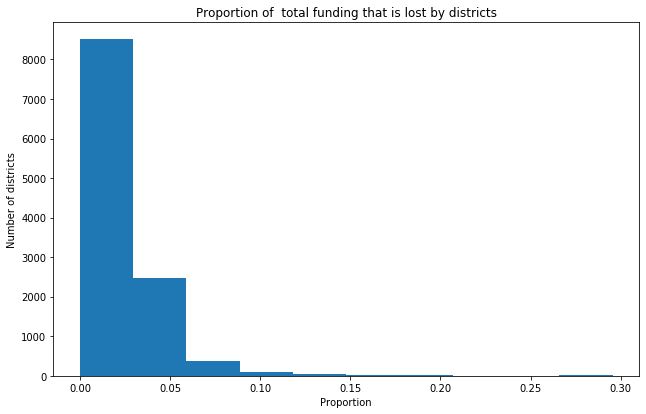

In [7]:
fig = plt.figure()
plt.hist(prop_deduct['Proportion cut'], bins = 10)
plt.title('Proportion of  total funding that is lost by districts')
plt.xlabel('Proportion')
plt.ylabel('Number of districts')
plt.savefig('budget_cut_proportion')
fig.set_size_inches(10.5, 6.5)
plt.show()

In [8]:
prop_deduct_sort = prop_deduct.sort_values(by = ['Proportion cut'], ascending = False)
prop_deduct_sort_topn = prop_deduct_sort.head(10) 
prop_deduct_sort_topn

,LEAID,NAME,TOTALREV,DEDUCT_15,Proportion cut
15896,4800191,NORTHWEST PREPARATORY,2000,591.0,0.295500
10134,3400059,Galloway Community Charter School,283000,83599.0,0.295403
12352,3800395,ROUGHRIDER AREA CAREER & TECHNICAL CENTER,365000,107822.0,0.295403
12944,3901570,Citizens Academy Southeast,1499000,442807.0,0.295402
15956,4800291,WINDHAM SCHOOL DISTRICT,3203000,946171.0,0.295401
15935,4800261,HARRIS COUNTY DEPT OF ED,1831000,540880.0,0.295401
15838,4800091,CHILDREN FIRST ACADEMY OF DALLAS,147000,43424.0,0.295401
2878,09D0001,COMMITTEE FOR SHARED SERVICES,439000,129681.0,0.295401
345,400206,Desert Springs Academy,529000,156267.0,0.295401
10142,3400075,Central Jersey Arts Charter School,342000,101027.0,0.295401


## Problem 2

##### A common problem with purely data-driven solutions is that they can inadvertently perpetuate hidden pre-existing biases in the data, and further disadvantage groups that are already disadvantaged. Calculate the proportion of enrolled students by race for each district, then visualize the distributions of these for districts that received budget cuts versus districts that did not receive budget cuts. Comment on whether the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

In [9]:
nces_data_cut = nces_data_demo
nces_data_cut['Budget cut'] = np.where(nces_data_cut['LEAID'].isin(neg_debt['LEAID']), 1, 0)

In [10]:
Race_dict = {
    'AM': 'American Indian/Alaska Native',
    'AS': 'Asian',
    'HI': 'Hispanic',
    'BL': 'Black',
    'WH': 'White',
    'HP': 'Hawaiian Native/Pacific Islander',
    'TR': 'Two or More Races',
}

In [11]:
for race in Race_dict.keys():
    nces_data_cut['prop_'+race] = (nces_data_cut[race] / nces_data_cut['TOTAL']).fillna(0)

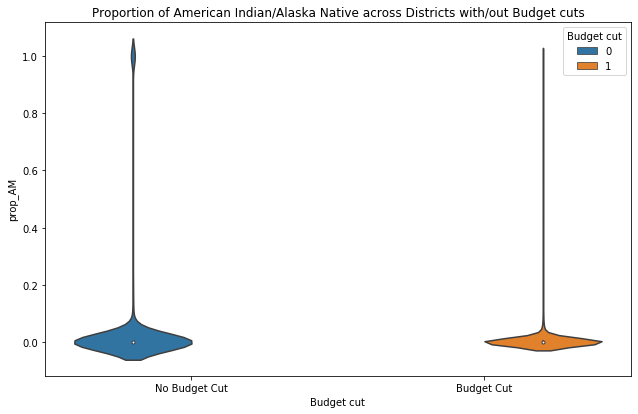

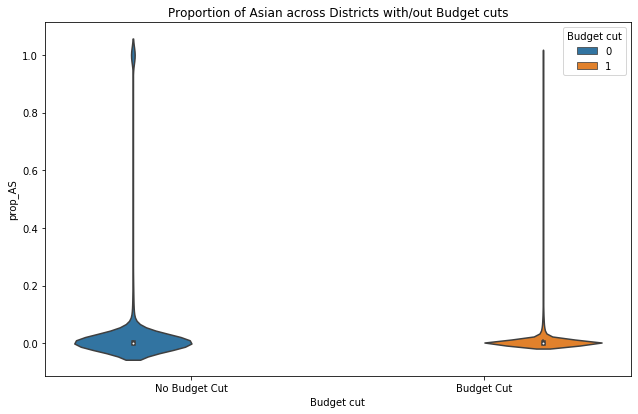

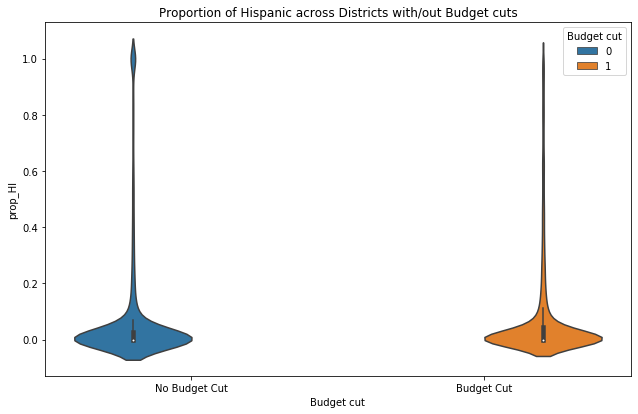

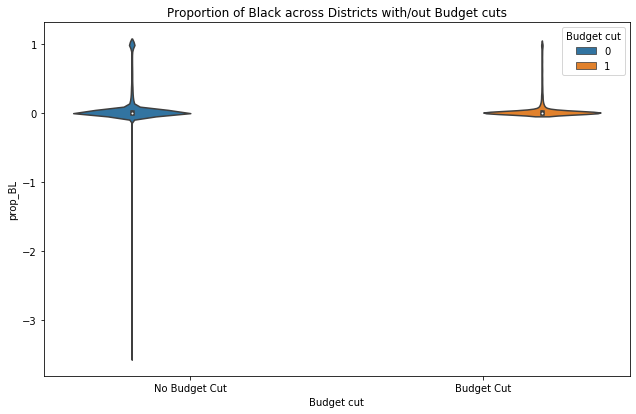

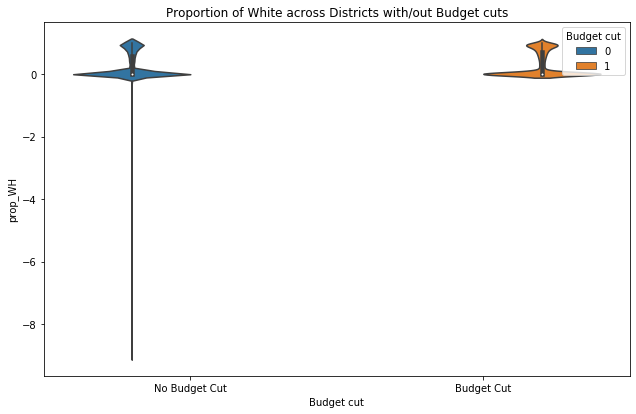

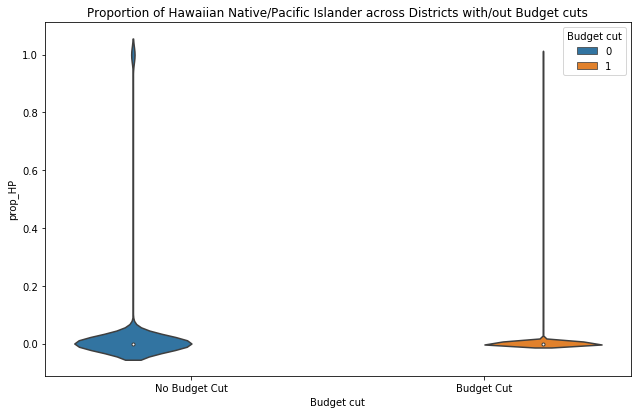

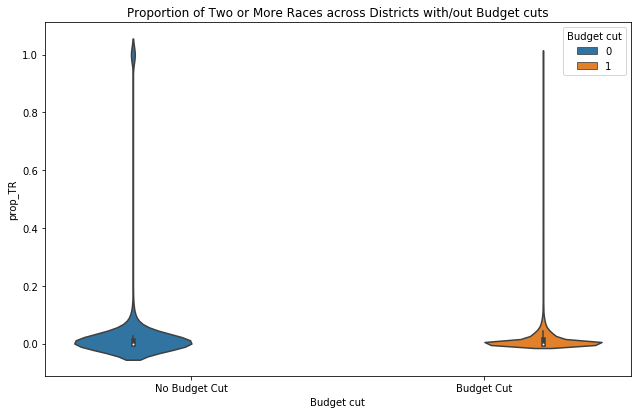

In [12]:
for race in Race_dict.keys():
    fig, ax = plt.subplots()
    sns.violinplot(x = nces_data_cut['Budget cut'], y = nces_data_cut['prop_'+race], hue = nces_data_cut['Budget cut'], ax = ax)
    ax.set_xticklabels(["No Budget Cut", "Budget Cut"])
    fig.set_size_inches(10.5, 6.5)
    plt.title(Race_dict[race])
    plt.title("Proportion of " + Race_dict[race] + " across Districts with/out Budget cuts")
    #plt.savefig('proportion_cut_'+Race_dict[race])

From the above plots we can see that there isn't alot of difference between districts that might face budget cuts versus those that will not. The paired violin plots do not show a lot of difference in their proportions for eachof the identified ethnicities. The only distinction we can see between them is of the outliers. Thus, it seems like the method used here, for selection of which schools will face a budget cut manages to avoid any hidden biases.

## Problem 3

##### Calculate the proportion of enrolled students by disability status (students with an IEP under IDEA) for each district, then visualize the distributions of these proportions for districts that received budget cuts versus districts that did not receive budget cuts. Comment on whether the distributions appear to be the same or different. Did your selection include any hidden biases, or manage to avoid them?

In [13]:
iep_data = pd.read_csv('/Users/alefiyanaseem/Desktop/Data Visualization/ccd_lea_002089_1516_w_1a_011717.csv')
nces_data_iep = pd.merge(nces_data_demo, iep_data, on = ["LEAID"], how = "left")

In [14]:
nces_data_iep_temp = nces_data_iep[~nces_data_iep['TOTAL'].isna()]

In [15]:
nces_data_iep_cut = nces_data_iep_temp[(nces_data_iep_temp['TOTAL']>0) & (nces_data_iep_temp['SPECED'] > 0)]

In [16]:
nces_data_iep_cut['prop_iep'] = (nces_data_iep_cut['SPECED'] / nces_data_iep_cut['TOTAL']).fillna(0)
nces_data_iep_cut[nces_data_iep_cut['prop_iep'] <= 1.0].shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(7371, 562)

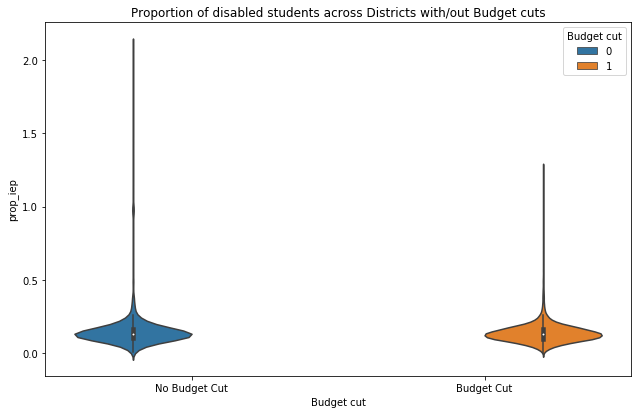

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
sns.violinplot(x = nces_data_iep_cut['Budget cut'], y = nces_data_iep_cut['prop_iep'], hue = nces_data_iep_cut['Budget cut'])
ax.set_xticklabels(["No Budget Cut", "Budget Cut"])
fig.set_size_inches(10.5, 6.5)
plt.title("Proportion of disabled students across Districts with/out Budget cuts")
plt.savefig('proportion_cut_disability status students')

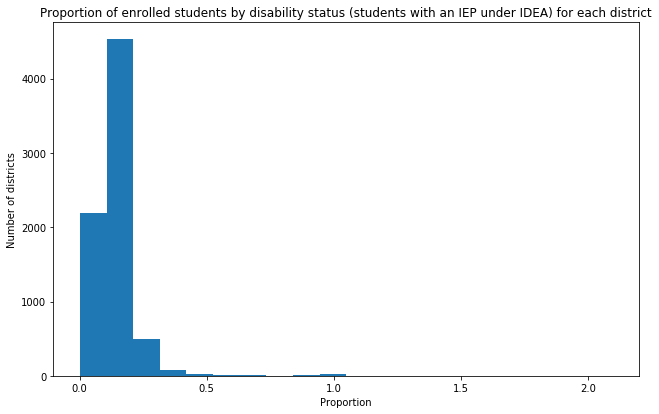

In [18]:
fig = plt.figure()
plt.hist(nces_data_iep_cut['prop_iep'], bins = 20)
plt.title('Proportion of enrolled students by disability status (students with an IEP under IDEA) for each district')
plt.xlabel('Proportion')
plt.ylabel('Number of districts')
plt.savefig('budget_cut_proportion_disability_students')
fig.set_size_inches(10.5, 6.5)
plt.show()

From the above plots it can be observed that the distribution of students with disability status for districts with and withput funding cut are more or less similar. We can see a higher proportion of students clustered near the top end of the "No budget cut" group and lower proportion for students with "budget cut" though this difference is very small. We can also see from the above histogram that the number of students on IEP is highly skewed on one side and hence, one cannot ocnfidently say if the method slected for funcding cut avoids any hidden biases or no.

## Problem 4

##### Choose and critique one of your fellow classmates’ selection of schools for budget cuts in HW 3 Problem 4 and Problem 5. What was the justification of their selection? Discuss any advantages or disadvantages of their approach.

Link to the hw3 submission: https://github.com/tonytontian/DS5500/blob/master/hw3/hw3.ipynb

The classmate suggests to to cut off 15% for every district which gets a positive number of federal funding. As it is the most equal way to do so.

The advantage of this method is that it is quite straightforward and simple. This approach makes it easy to understand how the budget cut takes place.

It is interesting to note that the author believes this is the most fair method. It does not take into consideration any other factors such as the performance of a particular school district or their financial condition if it is debt or no. It would be unfair to cut the budget from school districts that are already struggling and might also affect  students that are performing well in these schools despite of the low federal funding. Cutting of these schools budget might also lead to less extra curricular activities for this school in turn which might lead to students not performing well.

## Problem 5

##### Summarize and comment on what you learned from one the special topics lectures (MapReduce + Hadoop, Visualization, Causal Inference, or the Industry Panel) of your choice.

I would like to summarize and comment on what I learned from the Industry Panel i.e. "Data Science in the Real World: a practitioner’s panel" which was hosted on November 18, 2019. The panel consisted of the moderator: Faye Zheng who is a Data Scientist at Gamalon; and 4 panelists-
* Michelle Tat who is currently a Population Health Data Analyst at Haven Healthcare
* Daniel Hannah who is a data scientist at Vectra AI
* Katie Porter who is a Sales Engineering Lead at Tamr
* Luke Winslow who is a Data Science Manager at Wayfair

One interesting thing to note here was that all of them have very different job titles, responsibilities and acadmeic backgrounds but how each of those still intertwines and meets the principles of data science in their day to day tasks.

As a student who is actively looking to make a future in Data Science roles and looking for a job this talk was extremely helpful in setting expectations and understanding not only the job market but also it's needs.

A few key takeaways from the discussion were:

* Your background is not the only factor that decides whether you can get a data scientist job or no. Your interests are important too, the domain you want to work on and the path you want to take in your career depends on the company's values and the job offered too. Hence, research while applying  for a position. Do your interests match the company's interests too? You may not fit a 100% into their criteria but even then if you think that is somethign you can do then apply.

* Do the work. Know your data. Explore the data. Clean it. Graph it. Repeat. Look at the top 10 most frequent values. Study the outliers. Check the distributions. Group similar values if it’s too fragmented. Look for correlations and missing data. The more you know about your data, the better you will be able to ask questions and answer them.

* There’s a lot of communication involved in understanding the problem and delivering constant feedback to the stakeholders. But this is just the surface of the importance of communication – a much more important element for a data scientist is also asking the right questions. Data scientists are much more likely to fall into a trap of the curse of knowledge cognitive bias than any other occupation. This bias “occurs when an individual, communicating with other individuals, unknowingly assumes that the others have the background to understand.” When the data scientist is scoping out a problem together with the stakeholders or presenting the first findings, it is vital to be as explicit and detailed as possible and not assume that stakeholders know as much as you do. This is very hard as the number of assumptions and underlying methodologies that a data scientist makes can be counted in dozens, even hundreds.